In [ ]:
#This Jupyter Notebook compares four streams in different environments in the U.S. 
#Using hydrofunctions, we are able to plot the flow duration graphs for all four streams and compare them. 

In [1]:
#Import hydrofunctions, pyplot, and ticker (from github)
import hydrofunctions as hf
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
hf.draw_map()

In [3]:
#Choose four streams from different environments from HydroCloud. Import data for three years. 
#In this example, all four streams are in places with low development:
#Colorado Western Slopes: ROARING FORK RIVER NEAR ASPEN, CO.
#California Mendicino National Park: MAD R AB RUTH RES NR FOREST GLEN CA
#White Mountains, NH: EAST BRANCH PEMIGEWASSET RIVER AT LINCOLN, NH
#PINTO CREEK NEAR MIAMI, AZ
streams = ['09073400','11480390','01074520','09498502']
sites = hf.NWIS(streams, start_date='2001-01-01', end_date='2003-12-31')
sites.get_data()
sites.ok

True

In [4]:
#Create a dataframe of the four sites
Q = sites.df()
#Show the first few lines of the dataframe
Q.head()

,USGS:01074520:00060:00003,USGS:01074520:00060:00003_qualifiers,USGS:09073400:00060:00003,USGS:09073400:00060:00003_qualifiers,USGS:09498502:00060:00003,USGS:09498502:00060:00003_qualifiers,USGS:11480390:00060:00003,USGS:11480390:00060:00003_qualifiers
2001-01-01,160.0,A,22.0,A e,2.7,A,21.0,A
2001-01-02,138.0,A,23.0,A e,2.7,A,19.0,A
2001-01-03,132.0,A,21.0,A e,2.7,A,16.0,A
2001-01-04,125.0,A e,23.0,A e,2.7,A,15.0,A
2001-01-05,130.0,A e,24.0,A e,2.7,A,13.0,A


In [5]:
#drop the qualifiers columns
cols = [1,3,5,7]
Q.drop(Q.columns[cols],axis=1,inplace=True)
#rename the columns based on the names of the sites from HydroCloud
Q.columns=['White Mountains National Park', 'White River National Forest', 'Tonto National Forest', 'Mendicino National Park']
#show the first few rows of the data to confirm the changes
Q.head()

,White Mountains National Park,White River National Forest,Tonto National Forest,Mendicino National Park
2001-01-01,160.0,22.0,2.7,21.0
2001-01-02,138.0,23.0,2.7,19.0
2001-01-03,132.0,21.0,2.7,16.0
2001-01-04,125.0,23.0,2.7,15.0
2001-01-05,130.0,24.0,2.7,13.0


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x17eeffdc188>)

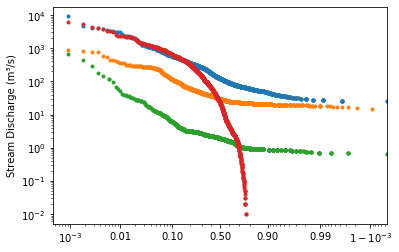

In [6]:
#use the built-in functions from hydrofunctions to create a flow duration graph for the dataframe.
hf.flow_duration(Q)

In [12]:
#if you want to create a legend and/or x-label, you can edit the code from hydrofunctions. 
#Pull it up by typing hf.flowduration??? then copy and paste into the next cell
hf.flow_duration??

In [7]:
#edit the code to add a title, x-axis label, and legend. Name it flow_duration_labeled
def flow_duration_labeled(Qdf, xscale='logit', yscale='log', ylabel='Stream Discharge (m³/s)', symbol='.'):
    """Creates a flow duration chart from a dataframe of discharges.

    Args:
        Qdf (dataframe): a dataframe of discharge values.
            * Values should be arranged in columns
            * No sorting necessary
            * Rows do not need an index
            * If more than one column, each column will be added as a\
                separate color to the chart.
            * Only include columns with discharge values; no metadata

        xscale ('logit' | 'linear'): Type of x scale for plotting probabilities
            default is 'logit', so that each standard deviation is nearly the
            same distance on the x scale. 'linear' is the other option.

        yscale ('log' | 'linear'): The type of y scale for plotting discharge.
            Default is 'log'.

        ylabel (str, default: 'Stream Discharge (m³/s)'): The label for the Y axis.

        xlabel (not implemented)

        symbol (str, '.' | ','): formatting symbol for points.
            * point: '.' (default)
            * pixel point: ','
            * circle: 'o'
            * triangle up: '^'

            See https://matplotlib.org/api/markers_api.html for full list of
            point formatters.

    Returns:
        fig (matplotlib.figure.Figure):
            a matplotlib figure. This will plot immediately in a Jupyter
            notebook if the command '%matplotlib inline' was previously issued.
            The figure may also be altered after it is returned.

        ax (matplotlib.axes.Axes):
            a matplotlib chart. This may be altered after it is returned.

    """
    rank = Qdf.rank(ascending=False, pct=True)
    x = rank
    y = Qdf
   # add an x-axis label
xlabel="Probability"
    fig, ax = plt.subplots(1, 1)
    ax.plot(x, y, symbol)
    ax.set_xscale(xscale)
    ax.set_yscale(yscale)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
#create a legend using the names of the columns. Place it in the upper right hand corner of the graph.
    ax.legend(Q.columns, loc='upper right')
# add a title
    ax.title.set_text("Flow Duration in Four Federal Lands")
    # A pyplot bug causes a valueError value if the xlabel is set.
    #ax.set_xlabel('Probability of Exceedence')
    ax.xaxis.set_minor_formatter(ticker.NullFormatter())
    return fig, ax

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x17ef1513448>)

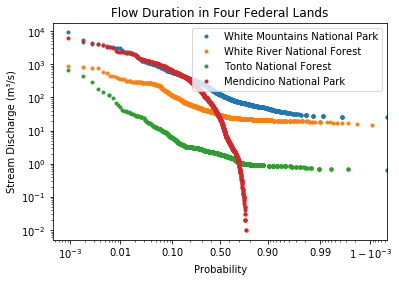

In [8]:
#plot the new function
flow_duration_labeled(Q)

In [9]:
#Pull the stats for each of the four sites.
Q.describe()

,White Mountains National Park,White River National Forest,Tonto National Forest,Mendicino National Park
count,1095.000000,1095.000000,1095.000000,1095.000000
mean,282.006941,57.492785,5.144813,221.987370
std,526.176775,81.064415,28.089932,514.204177
min,25.000000,14.000000,0.670000,0.000000
25%,66.300000,22.700000,1.000000,0.085000
50%,123.000000,29.000000,1.920000,22.500000
75%,305.500000,51.850000,3.000000,212.500000
max,9090.000000,916.000000,691.000000,6270.000000
